# <img src="datamaining.jpg">
# <center> <font color=darkblue>PROJET DATA MAINING</font></center>
<center> <font size='5px'>KHEMAIS ABDALLAH</font></center>
<center> <font size='3px'>mariem romdhane 3DNI1</font></center>

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Exporter BL-Flickr-Images-Book.csv dans un data frame nomé df
pd.set_option('display.max_colwidth', 100)
df=pd.read_csv('tweets.csv',encoding='utf_8')
#df.head()
df.head()

,1338634877130792962,2020-12-14 23:59:59,0,0.1,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's party founders, who https://t.co/Cq1LrtVvmL"
0,1338634877130788864,2020-12-14 23:59:59,0,411,RT @HeartofGulf_TH: Have a good dream see you tomorrow. # #GulfKanawut # https://t.co/rqvDhshtH8
1,1338634877126799360,2020-12-14 23:59:59,0,26306,RT @TokyosDemons: bro is struggling https://t.co/0wUOrp5o05
2,1338634877126778881,2020-12-14 23:59:59,0,0,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
3,1338634877126778880,2020-12-14 23:59:59,1,0,107.29 daylight operations #waivers mitigate risk &amp; extend your team's capabilities. Are you...
4,1338634877122584578,2020-12-14 23:59:59,1,0,Duke is definitely getting fed up of me making him stand still for photos\n\n#letmeplay #Boxers ...


In [3]:
col_names = ['id','Timestamp','nombre de favoris','nombre de Retweet',
             'Tweets']

df = pd.read_csv(r'tweets.csv', names=col_names, header=None)
df.head()

,id,Timestamp,nombre de favoris,nombre de Retweet,Tweets
0,1338634877130792962,2020-12-14 23:59:59,0,0,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p..."
1,1338634877130788864,2020-12-14 23:59:59,0,411,RT @HeartofGulf_TH: Have a good dream see you tomorrow. # #GulfKanawut # https://t.co/rqvDhshtH8
2,1338634877126799360,2020-12-14 23:59:59,0,26306,RT @TokyosDemons: bro is struggling https://t.co/0wUOrp5o05
3,1338634877126778881,2020-12-14 23:59:59,0,0,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
4,1338634877126778880,2020-12-14 23:59:59,1,0,107.29 daylight operations #waivers mitigate risk &amp; extend your team's capabilities. Are you...


In [4]:
col_names = ['id','Timestamp','nombre de favoris','nombre de Retweet',
             'Tweets']

df = pd.read_csv(r'tweets.csv', names=col_names, header=None)
df.head()

,id,Timestamp,nombre de favoris,nombre de Retweet,Tweets
0,1338634877130792962,2020-12-14 23:59:59,0,0,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p..."
1,1338634877130788864,2020-12-14 23:59:59,0,411,RT @HeartofGulf_TH: Have a good dream see you tomorrow. # #GulfKanawut # https://t.co/rqvDhshtH8
2,1338634877126799360,2020-12-14 23:59:59,0,26306,RT @TokyosDemons: bro is struggling https://t.co/0wUOrp5o05
3,1338634877126778881,2020-12-14 23:59:59,0,0,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
4,1338634877126778880,2020-12-14 23:59:59,1,0,107.29 daylight operations #waivers mitigate risk &amp; extend your team's capabilities. Are you...


# Résumé de l'ensemble de données 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12433 entries, 0 to 12432
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 12433 non-null  int64 
 1   Timestamp          12433 non-null  object
 2   nombre de favoris  12433 non-null  int64 
 3   nombre de Retweet  12433 non-null  int64 
 4   Tweets             12433 non-null  object
dtypes: int64(3), object(2)
memory usage: 485.8+ KB


# Résumé statistique de la variable numérique

In [6]:
df.describe()

,id,nombre de favoris,nombre de Retweet
count,1.243300e+04,12433.000000,12433.000000
mean,1.338635e+18,1.544277,1850.308373
std,1.301722e+10,24.149946,7616.358738
min,1.338635e+18,0.000000,0.000000
25%,1.338635e+18,0.000000,0.000000
50%,1.338635e+18,0.000000,0.000000
75%,1.338635e+18,0.000000,117.000000
max,1.338635e+18,1557.000000,164327.000000


# Nombre des Features et Nombre des samples

In [7]:
df.shape

(12433, 5)

# Affichage des Tweets Plus clairement pour savoir ce qui est nécessaire pour  Prétraitement (cleaning) tweets(Text) 

In [8]:
df['Tweets'].head(50)

0     Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p...
1       RT @HeartofGulf_TH: Have a good dream see you tomorrow.  # #GulfKanawut # https://t.co/rqvDhshtH8
2                                            RT @TokyosDemons: bro is struggling  https://t.co/0wUOrp5o05
3     Hypertension may cause poor communication between brain regions. A test that measures blood flow...
4     107.29 daylight operations #waivers mitigate risk &amp; extend your team's capabilities. Are you...
5     Duke is definitely getting fed up of me making him stand still for photos\n\n#letmeplay #Boxers ...
6                                      @ii_Turxles why do yall have to point that out everytime jiewfewfw
7     @RepPaulMitchell @realDonaldTrump @senatemajldr And what will be your legacy?\n\nIf you don't st...
8                     @yuzushiraishi spy base prefabs, probably vault and camera system, that's it, watch
9     RT @HashimeJam: trading twitter account 

# Dropping unnecessary columns

In [9]:
#Dropping unnecessary columns
to_drop = ['nombre de favoris',
           'nombre de Retweet',
           'Timestamp']

#Eliminer les colonnes dans la liste de to_drop du dataframe df
df.drop(to_drop, inplace=True, axis=1)

#Afficherle résultat
df.head()

,id,Tweets
0,1338634877130792962,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p..."
1,1338634877130788864,RT @HeartofGulf_TH: Have a good dream see you tomorrow. # #GulfKanawut # https://t.co/rqvDhshtH8
2,1338634877126799360,RT @TokyosDemons: bro is struggling https://t.co/0wUOrp5o05
3,1338634877126778881,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
4,1338634877126778880,107.29 daylight operations #waivers mitigate risk &amp; extend your team's capabilities. Are you...


# Rendre id index


In [10]:
###Changerl'index 
df.set_index('id', inplace=True)

###Afficher le résultat
df.head()

,Tweets
id,
1338634877130792962,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p..."
1338634877130788864,RT @HeartofGulf_TH: Have a good dream see you tomorrow. # #GulfKanawut # https://t.co/rqvDhshtH8
1338634877126799360,RT @TokyosDemons: bro is struggling https://t.co/0wUOrp5o05
1338634877126778881,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
1338634877126778880,107.29 daylight operations #waivers mitigate risk &amp; extend your team's capabilities. Are you...


# Cleaning tweets supprimer  @username,hatshtags,retweets et URLs

In [11]:
#cleaning tweets
#create function to clean the tweets
def cleaningtweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '',tweet)#remove @username
    tweet = re.sub(r'#', '',tweet)#removehatshtags
    tweet = re.sub(r'RT[\s]+', '',tweet)#remove retweets
    tweet = re.sub(r'https?:\/\/\S+', '',tweet)#remove URLs
    return tweet

In [12]:
df['Tweets'] = df['Tweets'].apply(cleaningtweet)

In [13]:
df.head(50)

,Tweets
id,
1338634877130792962,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p..."
1338634877130788864,_TH: Have a good dream see you tomorrow. GulfKanawut
1338634877126799360,: bro is struggling
1338634877126778881,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
1338634877126778880,107.29 daylight operations waivers mitigate risk &amp; extend your team's capabilities. Are you ...
1338634877122584578,Duke is definitely getting fed up of me making him stand still for photos\n\nletmeplay Boxers do...
1338634877122568192,_Turxles why do yall have to point that out everytime jiewfewfw
1338634877114191873,"And what will be your legacy?\n\nIf you don't stand for something, yo"
1338634877114134528,"spy base prefabs, probably vault and camera system, that's it, watch"


In [14]:
df.shape

(12433, 1)

# remove ponctuation

In [15]:
"I am Student" == "I am Student."

False

In [16]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# removing html


In [17]:
def remove_html(text):
    html=re.compile(r"<.*?>")
    return html.sub(r"", text)

In [18]:
df['Tweets'] = df['Tweets'].apply(remove_html)
df.head()

,Tweets
id,
1338634877130792962,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p..."
1338634877130788864,_TH: Have a good dream see you tomorrow. GulfKanawut
1338634877126799360,: bro is struggling
1338634877126778881,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
1338634877126778880,107.29 daylight operations waivers mitigate risk &amp; extend your team's capabilities. Are you ...


# removing emojs

In [19]:
import re
import sys

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [20]:
df['Tweets'] = df['Tweets'].apply(remove_emoji)
df.head()

,Tweets
id,
1338634877130792962,"Although it's factually untrue, the way he is painting Hitler would make him an ally of Bibi's p..."
1338634877130788864,_TH: Have a good dream see you tomorrow. GulfKanawut
1338634877126799360,: bro is struggling
1338634877126778881,Hypertension may cause poor communication between brain regions. A test that measures blood flow...
1338634877126778880,107.29 daylight operations waivers mitigate risk &amp; extend your team's capabilities. Are you ...


# Remove punctuation

In [21]:
def remove_punctuation(txt):
    txt_nopunct="".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [22]:
df['Tweets'] = df['Tweets'].apply(remove_punctuation)
df.head()

,Tweets
id,
1338634877130792962,Although its factually untrue the way he is painting Hitler would make him an ally of Bibis part...
1338634877130788864,TH Have a good dream see you tomorrow GulfKanawut
1338634877126799360,bro is struggling
1338634877126778881,Hypertension may cause poor communication between brain regions A test that measures blood flow ...
1338634877126778880,10729 daylight operations waivers mitigate risk amp extend your teams capabilities Are you ready...


# Deleting dupliate headlines(if any)

In [23]:
df.shape

(12433, 1)

In [24]:
df[df['Tweets'].duplicated(keep=False)].sort_values('Tweets')
df= df.drop_duplicates('Tweets')

In [25]:
df.shape

(11333, 1)

# remove \n et \r et changer uppercase par lowercase

In [26]:
def cleaning(tweet):
    tweet = re.sub('\\r*\\n*\\\\*', '', tweet)
    tweet = tweet.lower()
    
    return tweet

In [27]:
df['Tweets'] = df['Tweets'].apply(cleaning)
df['Tweets'].head(50)

id
1338634877130792962    although its factually untrue the way he is painting hitler would make him an ally of bibis part...
1338634877130788864                                                  th have a good dream see you tomorrow   gulfkanawut  
1338634877126799360                                                                                    bro is struggling  
1338634877126778881    hypertension may cause poor communication between brain regions a test that measures blood flow ...
1338634877126778880    10729 daylight operations waivers mitigate risk amp extend your teams capabilities are you ready...
1338634877122584578    duke is definitely getting fed up of me making him stand still for photosletmeplay boxers dogs d...
1338634877122568192                                         turxles why do yall have to point that out everytime jiewfewfw
1338634877114191873                                        and what will be your legacyif you dont stand for something yo 
1338634877114

# remove les nombres

In [28]:
unwanted_characters = ['0', '1', '2','3','4', '5', '6','7','8','9']

def clean_data(dop):
    for character in unwanted_characters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    return dop
df['Tweets'] = df['Tweets'].apply(clean_data)
df['Tweets'].head(30)

id
1338634877130792962    although its factually untrue the way he is painting hitler would make him an ally of bibis part...
1338634877130788864                                                  th have a good dream see you tomorrow   gulfkanawut  
1338634877126799360                                                                                    bro is struggling  
1338634877126778881    hypertension may cause poor communication between brain regions a test that measures blood flow ...
1338634877126778880                                                                                                       
1338634877122584578    duke is definitely getting fed up of me making him stand still for photosletmeplay boxers dogs d...
1338634877122568192                                         turxles why do yall have to point that out everytime jiewfewfw
1338634877114191873                                        and what will be your legacyif you dont stand for something yo 
1338634877114

# chat word elemniation

In [29]:
short_form_list = open('chat.txt', 'r')
chat_words_str = short_form_list.read()
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split(",")[0]
        cw_expanded = line.split(",")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.lower() in chat_words_list:
            new_text.append(chat_words_map_dict[w.lower()])
        else:
            new_text.append(w)
    return " ".join(new_text)
df['Tweets'] = df['Tweets'].apply(chat_words_conversion)
df['Tweets'].head(60)


id
1338634877130792962    although its factually untrue the way he is painting hitler would make him an ally of bibis part...
1338634877130788864                                                     the have a good dream see you tomorrow gulfkanawut
1338634877126799360                                                                                  brother is struggling
1338634877126778881    hypertension may cause poor communication between brain regions a test that measures blood flow ...
1338634877126778880                                                                                                       
1338634877122584578    duke is definitely getting fed up of me making him stand still for photosletmeplay boxers dogs d...
1338634877122568192                                      turxles why do you all have to point that out everytime jiewfewfw
1338634877114191873                                         and what will be your legacyif you dont stand for something yo
1338634877114

# remove non english word

In [30]:
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\RIMA\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [31]:
def eng(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) if w.lower() in words or not w.isalpha())
                    
df['Tweets'] = df['Tweets'].apply(eng)
df['Tweets'].head(50)

id
1338634877130792962               although its factually untrue the way he is painting would make him an ally of party who
1338634877130788864                                                                 the have a good dream see you tomorrow
1338634877126799360                                                                                  brother is struggling
1338634877126778881              hypertension may cause poor communication between brain a test that blood flow in the bra
1338634877126778880                                                                                                       
1338634877122584578                                duke is definitely getting fed up of me making him stand still for dogs
1338634877122568192                                                                  why do you all have to point that out
1338634877114191873                                                  and what will be your you dont stand for something yo
1338634877114

# spelling

In [32]:
from textblob import Word
from textblob import TextBlob
def spelling(a):
    b = TextBlob(a)
    return b.correct()
print(spelling("lthough"))
df["Tweets-spelling"] = df["Tweets"].apply(lambda text: spelling(text))
df.head(5)

though


,Tweets,Tweets-spelling
id,,
1338634877130792962,although its factually untrue the way he is painting would make him an ally of party who,"(a, l, t, h, o, u, g, h, , i, t, s, , a, c, t, u, a, l, l, y, , u, n, t, r, u, e, , t, h, e,..."
1338634877130788864,the have a good dream see you tomorrow,"(t, h, e, , h, a, v, e, , a, , g, o, o, d, , d, r, e, a, m, , s, e, e, , y, o, u, , t, o,..."
1338634877126799360,brother is struggling,"(b, r, o, t, h, e, r, , i, s, , s, t, r, u, g, g, l, i, n, g)"
1338634877126778881,hypertension may cause poor communication between brain a test that blood flow in the bra,"(h, y, p, e, r, t, e, n, s, i, o, n, , m, a, y, , c, a, u, s, e, , p, o, o, r, , c, o, m, m,..."
1338634877126778880,,()


In [33]:
from textblob import Word
from textblob import TextBlob
def spelling(a):
    b = TextBlob(a)
    return "".join(b.correct())
print(spelling("lthough"))
df["Tweets-spell"] = df["Tweets"].apply(lambda text: spelling(text))
df.head(5)

though


,Tweets,Tweets-spelling,Tweets-spell
id,,,
1338634877130792962,although its factually untrue the way he is painting would make him an ally of party who,"(a, l, t, h, o, u, g, h, , i, t, s, , a, c, t, u, a, l, l, y, , u, n, t, r, u, e, , t, h, e,...",although its actually untrue the way he is painting would make him an ally of party who
1338634877130788864,the have a good dream see you tomorrow,"(t, h, e, , h, a, v, e, , a, , g, o, o, d, , d, r, e, a, m, , s, e, e, , y, o, u, , t, o,...",the have a good dream see you tomorrow
1338634877126799360,brother is struggling,"(b, r, o, t, h, e, r, , i, s, , s, t, r, u, g, g, l, i, n, g)",brother is struggling
1338634877126778881,hypertension may cause poor communication between brain a test that blood flow in the bra,"(h, y, p, e, r, t, e, n, s, i, o, n, , m, a, y, , c, a, u, s, e, , p, o, o, r, , c, o, m, m,...",hypertension may cause poor communication between brain a test that blood flow in the bar
1338634877126778880,,(),


# NLP
Preparing data for vectorizaion

# stop words

Suppression de tous les mots insignifiants dans les observations. C'est ce qu'on appelle les mots vides(stop words).Dans ce cas, il existe une bibliothèque fournie par nltk (natural language tool kit).

In [105]:
import nltk
import string                             
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer  
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RIMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
stopwords = nltk.corpus.stopwords.words('english')

print('Stop words\n')
print(stopwords)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [107]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RIMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Tokenize

In [108]:
from nltk import word_tokenize
def nltk_tokenise(text):
    tokens=word_tokenize(text)
    return tokens
df['tweets_tokens'] = df['Tweets-spell'].apply(lambda x: nltk_tokenise(x))
df.head(50)

,Tweets,Tweets-spelling,Tweets-spell,tweets_tokens,tweets_stop,tweets_stemmed,Tweets_lemmatized
id,,,,,,,
1338634877130792962,although its factually untrue the way he is painting would make him an ally of party who,"(a, l, t, h, o, u, g, h, , i, t, s, , a, c, t, u, a, l, l, y, , u, n, t, r, u, e, , t, h, e,...",although its actually untrue the way he is painting would make him an ally of party who,"[although, its, actually, untrue, the, way, he, is, painting, would, make, him, an, ally, of, pa...",although actually untrue way painting would make ally party,although actually untrue way painting would make ally party,a l t h o u g h a c t u a l l y u n t r u e w a y p a i n t i n g w o u l d m a k e ...
1338634877130788864,the have a good dream see you tomorrow,"(t, h, e, , h, a, v, e, , a, , g, o, o, d, , d, r, e, a, m, , s, e, e, , y, o, u, , t, o,...",the have a good dream see you tomorrow,"[the, have, a, good, dream, see, you, tomorrow]",good dream see tomorrow,good dream see tomorrow,g o o d d r e a m s e e t o m o r r o w
1338634877126799360,brother is struggling,"(b, r, o, t, h, e, r, , i, s, , s, t, r, u, g, g, l, i, n, g)",brother is struggling,"[brother, is, struggling]",brother struggling,brother struggling,b r o t h e r s t r u g g l i n g
1338634877126778881,hypertension may cause poor communication between brain a test that blood flow in the bra,"(h, y, p, e, r, t, e, n, s, i, o, n, , m, a, y, , c, a, u, s, e, , p, o, o, r, , c, o, m, m,...",hypertension may cause poor communication between brain a test that blood flow in the bar,"[hypertension, may, cause, poor, communication, between, brain, a, test, that, blood, flow, in, ...",hypertension may cause poor communication brain test blood flow bar,hypertension may cause poor communication brain test blood flow bar,h y p e r t e n s i o n m a y c a u s e p o o r c o m m u n i c a t i o n b r a i n ...
1338634877126778880,,(),,[],,,
1338634877122584578,duke is definitely getting fed up of me making him stand still for dogs,"(d, u, k, e, , i, s, , d, e, f, i, n, i, t, e, l, y, , g, e, t, t, i, n, g, , f, e, d, , u,...",duke is definitely getting fed up of me making him stand still for dogs,"[duke, is, definitely, getting, fed, up, of, me, making, him, stand, still, for, dogs]",duke definitely getting fed making stand still dogs,duke definitely getting fed making stand still dogs,d u k e d e f i n i t e l y g e t t i n g f e d m a k i n g s t a n d s t i l l d ...
1338634877122568192,why do you all have to point that out,"(w, h, y, , d, o, , y, o, u, , a, l, l, , h, a, v, e, , t, o, , p, o, i, n, t, , t, h, a,...",why do you all have to point that out,"[why, do, you, all, have, to, point, that, out]",point,point,p o i n t
1338634877114191873,and what will be your you dont stand for something yo,"(a, n, d, , w, h, a, t, , w, i, l, l, , b, e, , y, o, u, r, , y, o, u, , d, o, n, t, , s,...",and what will be your you dont stand for something to,"[and, what, will, be, your, you, dont, stand, for, something, to]",dont stand something,dont stand something,d o n t s t a n d s o m e t h i n g
1338634877114134528,spy base probably vault and camera system thats it watch,"(s, p, y, , b, a, s, e, , p, r, o, b, a, b, l, y, , v, a, u, l, t, , a, n, d, , c, a, m, e,...",spy base probably vault and camera system that it watch,"[spy, base, probably, vault, and, camera, system, that, it, watch]",spy base probably vault camera system watch,spy base probably vault camera system watch,s p y b a s e p r o b a b l y v a u l t c a m e r a s y s t e m w a t c h


# remove stop words 

In [109]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

df["tweets_stop"] = df["Tweets-spell"].apply(lambda text: remove_stopwords(text))
df.head()


,Tweets,Tweets-spelling,Tweets-spell,tweets_tokens,tweets_stop,tweets_stemmed,Tweets_lemmatized
id,,,,,,,
1338634877130792962,although its factually untrue the way he is painting would make him an ally of party who,"(a, l, t, h, o, u, g, h, , i, t, s, , a, c, t, u, a, l, l, y, , u, n, t, r, u, e, , t, h, e,...",although its actually untrue the way he is painting would make him an ally of party who,"[although, its, actually, untrue, the, way, he, is, painting, would, make, him, an, ally, of, pa...",although actually untrue way painting would make ally party,although actually untrue way painting would make ally party,a l t h o u g h a c t u a l l y u n t r u e w a y p a i n t i n g w o u l d m a k e ...
1338634877130788864,the have a good dream see you tomorrow,"(t, h, e, , h, a, v, e, , a, , g, o, o, d, , d, r, e, a, m, , s, e, e, , y, o, u, , t, o,...",the have a good dream see you tomorrow,"[the, have, a, good, dream, see, you, tomorrow]",good dream see tomorrow,good dream see tomorrow,g o o d d r e a m s e e t o m o r r o w
1338634877126799360,brother is struggling,"(b, r, o, t, h, e, r, , i, s, , s, t, r, u, g, g, l, i, n, g)",brother is struggling,"[brother, is, struggling]",brother struggling,brother struggling,b r o t h e r s t r u g g l i n g
1338634877126778881,hypertension may cause poor communication between brain a test that blood flow in the bra,"(h, y, p, e, r, t, e, n, s, i, o, n, , m, a, y, , c, a, u, s, e, , p, o, o, r, , c, o, m, m,...",hypertension may cause poor communication between brain a test that blood flow in the bar,"[hypertension, may, cause, poor, communication, between, brain, a, test, that, blood, flow, in, ...",hypertension may cause poor communication brain test blood flow bar,hypertension may cause poor communication brain test blood flow bar,h y p e r t e n s i o n m a y c a u s e p o o r c o m m u n i c a t i o n b r a i n ...
1338634877126778880,,(),,[],,,


In [39]:
from collections import Counter
cnt = Counter()
for text in df["tweets_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(50)

[('like', 519),
 ('dont', 456),
 ('one', 342),
 ('want', 307),
 ('know', 300),
 ('love', 300),
 ('get', 297),
 ('people', 293),
 ('good', 285),
 ('time', 233),
 ('u', 233),
 ('see', 209),
 ('think', 205),
 ('day', 200),
 ('new', 194),
 ('need', 190),
 ('really', 189),
 ('right', 185),
 ('tramp', 184),
 ('go', 181),
 ('please', 174),
 ('could', 172),
 ('got', 172),
 ('would', 167),
 ('going', 159),
 ('laughing', 159),
 ('make', 157),
 ('back', 152),
 ('never', 150),
 ('oh', 149),
 ('even', 145),
 ('first', 145),
 ('thank', 142),
 ('us', 142),
 ('still', 141),
 ('today', 134),
 ('god', 130),
 ('say', 130),
 ('said', 125),
 ('well', 125),
 ('way', 124),
 ('much', 123),
 ('life', 116),
 ('loud', 115),
 ('ever', 113),
 ('man', 110),
 ('take', 109),
 ('yes', 107),
 ('someone', 103),
 ('ill', 101)]

# Stemming 

Stemming (La tige) est également une bonne pratique car elle consiste à réduire un mot à sa forme racine. Par exemple, le mot détenu peut être réduit à détenir ou à une forme encore plus simple.

In [40]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# dir(porter_stemmer)

In [41]:
def stemming(tokenized_text):
    text = "".join([porter_stemmer.stem(word) for word in tokenized_text])
    return text

In [42]:
df['tweets_stemmed'] = df['tweets_stop'].apply(lambda x: stemming(x))
df.head()

,Tweets,Tweets-spelling,Tweets-spell,tweets_tokens,tweets_stop,tweets_stemmed
id,,,,,,
1338634877130792962,although its factually untrue the way he is painting would make him an ally of party who,"(a, l, t, h, o, u, g, h, , i, t, s, , a, c, t, u, a, l, l, y, , u, n, t, r, u, e, , t, h, e,...",although its actually untrue the way he is painting would make him an ally of party who,"[although, its, actually, untrue, the, way, he, is, painting, would, make, him, an, ally, of, pa...",although actually untrue way painting would make ally party,although actually untrue way painting would make ally party
1338634877130788864,the have a good dream see you tomorrow,"(t, h, e, , h, a, v, e, , a, , g, o, o, d, , d, r, e, a, m, , s, e, e, , y, o, u, , t, o,...",the have a good dream see you tomorrow,"[the, have, a, good, dream, see, you, tomorrow]",good dream see tomorrow,good dream see tomorrow
1338634877126799360,brother is struggling,"(b, r, o, t, h, e, r, , i, s, , s, t, r, u, g, g, l, i, n, g)",brother is struggling,"[brother, is, struggling]",brother struggling,brother struggling
1338634877126778881,hypertension may cause poor communication between brain a test that blood flow in the bra,"(h, y, p, e, r, t, e, n, s, i, o, n, , m, a, y, , c, a, u, s, e, , p, o, o, r, , c, o, m, m,...",hypertension may cause poor communication between brain a test that blood flow in the bar,"[hypertension, may, cause, poor, communication, between, brain, a, test, that, blood, flow, in, ...",hypertension may cause poor communication brain test blood flow bar,hypertension may cause poor communication brain test blood flow bar
1338634877126778880,,(),,[],,


# Lemmatization

Lemmatization est similaire à la radicalisation, mais elle apporte un contexte aux mots et va donc plus loin en reliant des mots ayant une signification similaire à un mot.

In [43]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RIMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
# WordNet lexical database for lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatization(token_txt):
    text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in token_txt])
    return text
df['Tweets_lemmatized'] = df['tweets_stemmed'].apply(lambda x : lemmatization(x))
df.head()

,Tweets,Tweets-spelling,Tweets-spell,tweets_tokens,tweets_stop,tweets_stemmed,Tweets_lemmatized
id,,,,,,,
1338634877130792962,although its factually untrue the way he is painting would make him an ally of party who,"(a, l, t, h, o, u, g, h, , i, t, s, , a, c, t, u, a, l, l, y, , u, n, t, r, u, e, , t, h, e,...",although its actually untrue the way he is painting would make him an ally of party who,"[although, its, actually, untrue, the, way, he, is, painting, would, make, him, an, ally, of, pa...",although actually untrue way painting would make ally party,although actually untrue way painting would make ally party,a l t h o u g h a c t u a l l y u n t r u e w a y p a i n t i n g w o u l d m a k e ...
1338634877130788864,the have a good dream see you tomorrow,"(t, h, e, , h, a, v, e, , a, , g, o, o, d, , d, r, e, a, m, , s, e, e, , y, o, u, , t, o,...",the have a good dream see you tomorrow,"[the, have, a, good, dream, see, you, tomorrow]",good dream see tomorrow,good dream see tomorrow,g o o d d r e a m s e e t o m o r r o w
1338634877126799360,brother is struggling,"(b, r, o, t, h, e, r, , i, s, , s, t, r, u, g, g, l, i, n, g)",brother is struggling,"[brother, is, struggling]",brother struggling,brother struggling,b r o t h e r s t r u g g l i n g
1338634877126778881,hypertension may cause poor communication between brain a test that blood flow in the bra,"(h, y, p, e, r, t, e, n, s, i, o, n, , m, a, y, , c, a, u, s, e, , p, o, o, r, , c, o, m, m,...",hypertension may cause poor communication between brain a test that blood flow in the bar,"[hypertension, may, cause, poor, communication, between, brain, a, test, that, blood, flow, in, ...",hypertension may cause poor communication brain test blood flow bar,hypertension may cause poor communication brain test blood flow bar,h y p e r t e n s i o n m a y c a u s e p o o r c o m m u n i c a t i o n b r a i n ...
1338634877126778880,,(),,[],,,


# Vectorization

Processus de codage du texte sous forme d'entiers pour créer des vecteurs de caractéristiques.

Feature Vector: vecteur de caractéristiques numériques qui représentent un objet

Types de vectorisation:

<br>1-Count Vectorization</br>
<br>2-N-grams</br>
<br>3-TF-IDF</br>
<br>nous avons choisi Count Vectorization</br>
<br>Le vectoriseur peut être un vectoriseur de comptage ou un vectoriseur TFIDF. Le Count Vectorization compte simplement l'instance / fréquence d'un mot dans une observation entière tandis qu'un vectoriseur TFIDF compte la «fraction» du temps où il se produit dans une observation entière lorsque sa valeur augmente proportionnellement au comptage.</br>

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 800,
    stop_words = 'english'
)
print(tfidf.get_feature_names)
tfidf.fit(df.tweets_stemmed)
texte = tfidf.transform(df.tweets_stemmed)
print(texte)

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(max_df=0.95, max_features=800, min_df=5, stop_words='english')>
  (0, 756)	0.47109163229750617
  (0, 498)	0.5602329670872336
  (0, 430)	0.4493601007785612
  (0, 11)	0.5121398211389026
  (1, 703)	0.6071393522545652
  (1, 284)	0.4333918827437736
  (1, 182)	0.6659979601438087
  (2, 78)	1.0
  (3, 684)	0.4656642311972013
  (3, 523)	0.47082533971947177
  (3, 95)	0.38859683249329385
  (3, 71)	0.4450043047560208
  (3, 46)	0.46091647159366417
  (5, 649)	0.5703300169169623
  (5, 431)	0.503198881425006
  (5, 272)	0.43145349830644164
  (5, 163)	0.4851416662535323
  (6, 519)	1.0
  (7, 649)	0.8807947473296786
  (7, 178)	0.47349827146088663
  (8, 752)	0.6731335850155158
  (8, 535)	0.7395209102683705
  (9, 723)	0.6593488731388785
  (9, 5)	0.7518371256399161
  (11, 227)	1.0
  :	:
  (11322, 496)	0.5396896591246091
  (11322, 468)	0.5025296240398923
  (11322, 463)	0.41386557774943994
  (11322, 79)	0.5337736714661094
  (11323, 527)	0.701233

In [47]:
print(tfidf.get_feature_names())

['able', 'absolute', 'absolutely', 'accept', 'access', 'account', 'achievement', 'act', 'acting', 'action', 'actual', 'actually', 'add', 'administration', 'afraid', 'age', 'agent', 'ago', 'agree', 'agreed', 'ahead', 'aime', 'air', 'album', 'amazing', 'anaemic', 'angry', 'answer', 'anxiety', 'apparently', 'appreciate', 'art', 'article', 'artist', 'ask', 'ass', 'ate', 'attack', 'attention', 'attorney', 'aunt', 'away', 'awesome', 'baby', 'bad', 'ball', 'bar', 'based', 'beat', 'beautiful', 'believe', 'belly', 'ben', 'best', 'bet', 'better', 'big', 'bigger', 'biggest', 'birthday', 'bit', 'bitch', 'black', 'block', 'blue', 'body', 'book', 'boss', 'bout', 'box', 'boy', 'brain', 'break', 'breakfast', 'breaking', 'bring', 'broke', 'broken', 'brother', 'brown', 'business', 'busy', 'buy', 'bye', 'calling', 'came', 'cap', 'car', 'card', 'care', 'case', 'cast', 'cat', 'catch', 'caught', 'cause', 'celebrate', 'certain', 'chairman', 'challenge', 'chance', 'change', 'channel', 'character', 'chat', 'ch

In [48]:
print(tfidf.get_feature_names)

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(max_df=0.95, max_features=800, min_df=5, stop_words='english')>


In [49]:
idf_df=pd.DataFrame(texte.toarray())
idf_df

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11328,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11329,0.503089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11330,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11331,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# distance de jaccard

In [50]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union
for text in df["tweets_stop"].values:
    for word in text.split():
        jaccard_similarity(word, word)
        print(jaccard_similarity(word, word))

0.7777777777777778
0.6
0.7142857142857143
1.0
0.6
1.0
1.0
0.6
1.0
0.6
1.0
0.5
0.45454545454545453
0.75
0.6666666666666666
0.7142857142857143
1.0
1.0
0.6
0.4444444444444444
1.0
0.6
0.6666666666666666
1.0
1.0
1.0
0.6666666666666666
0.5555555555555556
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7777777777777778
1.0
0.7142857142857143
0.7142857142857143
1.0
1.0
0.5555555555555556
0.75
1.0
0.8
1.0
1.0
1.0
1.0
1.0
0.75
1.0
1.0
1.0
1.0
0.75
1.0
1.0
1.0
0.6
0.75
1.0
1.0
1.0
1.0
1.0
1.0
0.6
1.0
1.0
0.5
1.0
1.0
1.0
0.6666666666666666
1.0
0.7142857142857143
0.6
0.6666666666666666
0.5555555555555556
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
0.5
1.0
1.0
1.0
1.0
1.0
0.6
1.0
0.6
0.75
0.7777777777777778
0.5
1.0
1.0
1.0
0.7777777777777778
0.42857142857142855
0.6363636363636364
0.5555555555555556
0.7142857142857143
0.7142857142857143
0.7142857142857143
1.0
0.5
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
0.5555555555555556
1.0
1.0
1.0
1.0
1.0
1.0
0.714285714285714

0.75
0.6
0.5555555555555556
0.5555555555555556
0.6
1.0
0.6
1.0
1.0
1.0
1.0
1.0
1.0
0.7777777777777778
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
0.38461538461538464
1.0
1.0
0.75
1.0
0.7142857142857143
0.75
0.45454545454545453
0.8
0.75
0.6
0.7777777777777778
1.0
1.0
1.0
1.0
1.0
0.7777777777777778
0.5555555555555556
0.75
1.0
0.6666666666666666
0.6
1.0
1.0
1.0
0.5714285714285714
0.5
0.7142857142857143
1.0
0.5555555555555556
1.0
0.75
0.75
0.6666666666666666
1.0
0.6
0.7777777777777778
1.0
0.6363636363636364
0.5555555555555556
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
1.0
0.6666666666666666
0.7142857142857143
1.0
0.7142857142857143
1.0
1.0
0.6666666666666666
0.75
1.0
1.0
0.7142857142857143
0.8181818181818182
1.0
0.6666666666666666
0.6
1.0
0.6923076923076923
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
0.75
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
0.7142857142857143
0.6666666666666666
0.5
1.0
1.0
0.6666666666666666
0.6
0.6
1.0
1.0
0.5
1.0
0.8181818181818182
1.0
0.8
1.0
1.0


1.0
0.5555555555555556
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
0.5555555555555556
0.7142857142857143
1.0
0.8181818181818182
1.0
1.0
0.42857142857142855
1.0
1.0
1.0
1.0
0.6666666666666666
0.7142857142857143
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5555555555555556
0.5555555555555556
0.75
1.0
0.42857142857142855
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
0.75
0.6666666666666666
0.7777777777777778
1.0
0.5555555555555556
1.0
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6363636363636364
0.42857142857142855
1.0
1.0
1.0
1.0
1.0
0.45454545454545453
0.6666666666666666
0.75
1.0
1.0
1.0
0.6
0.5555555555555556
0.7777777777777778
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
0.6
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
1.0
1.0
0.5
1.0
0.42857142857142855
0.8
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
0.7777777777777778
1.0
0.6923076923076923
0.7142857142857143
1.0
0.6666666666666666
0.5555555555555556
0.75
0.5714285714285714
1.0
1.0
0.5
1.0
1.0
1.0
0.6666666666666666
0.8181818

0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5555555555555556
1.0
0.6
0.7142857142857143
0.6
1.0
0.7142857142857143
1.0
0.7142857142857143
1.0
0.6666666666666666
0.7142857142857143
0.7142857142857143
1.0
0.45454545454545453
1.0
0.75
1.0
1.0
0.7777777777777778
1.0
1.0
1.0
0.5
1.0
1.0
1.0
0.75
0.8
0.5
1.0
1.0
0.7777777777777778
1.0
0.47368421052631576
1.0
1.0
1.0
1.0
1.0
0.75
0.6666666666666666
0.6923076923076923
1.0
1.0
1.0
0.6
1.0
0.7142857142857143
0.6
0.7142857142857143
0.5384615384615384
1.0
0.6
0.7142857142857143
1.0
0.6
1.0
0.6363636363636364
0.75
0.6666666666666666
0.7142857142857143
0.6
1.0
0.7142857142857143
1.0
0.6363636363636364
0.6363636363636364
0.5555555555555556
0.7142857142857143
0.5
1.0
0.75
0.7777777777777778
0.7777777777777778
1.0
0.6
0.75
0.6923076923076923
0.5
1.0
1.0
1.0
0.7777777777777778
1.0
0.5384615384615384
1.0
0.75
0.6
0.75
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
1.0
0.6666666666666666
1.0
1.0
0.6666666666666666


0.42857142857142855
0.6666666666666666
1.0
0.7142857142857143
1.0
1.0
0.5
1.0
0.5555555555555556
0.4
1.0
1.0
1.0
0.75
1.0
1.0
0.7777777777777778
1.0
1.0
1.0
0.6363636363636364
0.7142857142857143
1.0
0.75
0.7777777777777778
1.0
0.75
1.0
0.6363636363636364
0.5555555555555556
1.0
0.6
0.6
0.6666666666666666
0.6363636363636364
1.0
1.0
1.0
1.0
1.0
0.5714285714285714
1.0
1.0
0.7142857142857143
1.0
0.7777777777777778
0.7777777777777778
0.75
1.0
1.0
1.0
0.5
1.0
1.0
1.0
0.6
1.0
0.75
1.0
1.0
0.6
0.6363636363636364
1.0
0.6
1.0
1.0
0.6666666666666666
1.0
1.0
0.6666666666666666
1.0
0.7142857142857143
1.0
0.6
0.5
1.0
0.6363636363636364
0.6666666666666666
0.6
1.0
1.0
1.0
1.0
1.0
1.0
0.75
0.75
1.0
1.0
0.7777777777777778
0.75
0.7142857142857143
1.0
1.0
0.5
1.0
0.5
0.6666666666666666
0.75
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5555555555555556
1.0
0.7142857142857143
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
1.0
0.7142857142857143
1.0
1.0
1.0
0.5
1.0
1.0
0.7777777777777778
1.0
1.0
0.6
0.5
1.0
0.7142857142857143
1.0
0.77

0.75
0.7777777777777778
1.0
1.0
1.0
1.0
1.0
1.0
0.75
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
0.5714285714285714
0.6923076923076923
1.0
1.0
0.8
0.6666666666666666
0.6666666666666666
0.6666666666666666
1.0
0.42857142857142855
0.6
1.0
0.7142857142857143
1.0
1.0
0.7777777777777778
0.6
1.0
1.0
0.7142857142857143
0.6666666666666666
0.5
0.75
0.7142857142857143
1.0
1.0
1.0
1.0
0.7142857142857143
1.0
0.5
1.0
1.0
1.0
1.0
1.0
0.6
1.0
0.6363636363636364
1.0
0.6666666666666666
0.6
1.0
1.0
1.0
0.7777777777777778
1.0
1.0
0.75
0.6
1.0
1.0
1.0
0.5714285714285714
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
0.7777777777777778
0.6
1.0
0.7142857142857143
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
0.6
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
0.6363636363636364
0.6666666666666666
1.0
1.0
1.0
0.5
0.5
0.7142857142857143
1.0
0.6
0.6
1.0
0.7142857142857143
1.0
1.0
1.0
0.7777777777777778
1.0
0.6
1.0
1.0
0.6
1.0
0.6
0.6666666666666666
1.0
0.42857142857142855
1.0
1.0
1

1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.45454545454545453
0.7142857142857143
1.0
0.7142857142857143
1.0
0.7142857142857143
0.6666666666666666
0.6666666666666666
1.0
1.0
0.7777777777777778
1.0
1.0
0.6
0.7142857142857143
1.0
1.0
0.6666666666666666
1.0
0.6
1.0
1.0
0.5
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
0.6
1.0
0.8181818181818182
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6363636363636364
0.7142857142857143
0.6666666666666666
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
0.5555555555555556
1.0
0.4
1.0
1.0
0.5
0.75
1.0
0.7777777777777778
1.0
1.0
0.6666666666666666
1.0
0.6666666666666666
0.7142857142857143
0.7777777777777778
0.75
0.6
1.0
0.7142857142857143
1.0
0.5384615384615384
0.7142857142857143
0.6666666666666666
1.0
1.0
0.6666666666666666
0.45454545454545453
1.0
1.0
0.6
1.0
1.0
1.0
1.0
0.6
1.0
1.0
0.5555555555555556
0.75
1.0
0.4
1.0
1.0
0.7142857142857143
1.0
1.0
0.6666666666666666
0.6666666666666666
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0


0.6
1.0
1.0
1.0
0.6666666666666666
0.5555555555555556
0.8181818181818182
0.5
1.0
0.8181818181818182
1.0
0.6
0.5384615384615384
1.0
0.6666666666666666
0.5
0.7777777777777778
1.0
1.0
0.7777777777777778
1.0
0.5555555555555556
1.0
1.0
0.7777777777777778
1.0
0.5555555555555556
1.0
0.75
0.5555555555555556
0.4444444444444444
1.0
1.0
1.0
0.6
0.5
0.5
0.75
0.6666666666666666
1.0
0.5555555555555556
0.6
0.6
0.75
0.45454545454545453
0.75
1.0
0.6666666666666666
1.0
0.6
0.7777777777777778
0.6
1.0
1.0
0.6666666666666666
0.6
1.0
1.0
1.0
1.0
0.75
1.0
1.0
0.7777777777777778
0.7777777777777778
1.0
1.0
1.0
0.6666666666666666
1.0
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.6
0.6666666666666666
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
0.7142857142857143
1.0
0.75
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6363636363636364
0.5555555555555556
0.7142857142857143
1.0
1.0
1.0
0.7142857142857143
1.0
0.7142857142857143
1.0
1.0
0.75
0.7142857142857143
1.0
1.0
1.0
0.7142857142857

1.0
1.0
0.5
1.0
0.6
1.0
0.7142857142857143
0.75
1.0
0.8181818181818182
0.6
0.7142857142857143
1.0
0.6666666666666666
0.6666666666666666
1.0
1.0
1.0
0.6923076923076923
0.6
0.6666666666666666
1.0
0.7142857142857143
0.6666666666666666
1.0
0.6
1.0
0.5
1.0
0.6666666666666666
0.75
0.75
0.6
0.7142857142857143
1.0
1.0
1.0
0.6
1.0
0.5555555555555556
0.5
0.7142857142857143
0.7142857142857143
0.5555555555555556
0.6
0.7777777777777778
1.0
1.0
0.5384615384615384
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
0.8181818181818182
1.0
1.0
1.0
1.0
1.0
0.6
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
0.7777777777777778
0.5
1.0
1.0
1.0
1.0
1.0
0.5
1.0
1.0
1.0
0.47368421052631576
0.7777777777777778
1.0
0.6666666666666666
1.0
0.5555555555555556
1.0
1.0
0.7333333333333333
1.0
1.0
1.0
0.75
1.0
1.0
1.0
0.75
0.6666666666666666
0.5384615384615384
1.0
0.6
1.0
1.0
0.8
1.0
0.5555555555555556
0.6666666666666666
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
0.6666666666666666
0.714285714285

0.75
0.6
1.0
0.7777777777777778
1.0
0.6666666666666666
1.0
1.0
1.0
0.75
0.5555555555555556
1.0
1.0
0.5
1.0
0.5555555555555556
0.8333333333333334
1.0
1.0
0.7142857142857143
1.0
0.5555555555555556
1.0
1.0
1.0
0.6
0.6
1.0
0.6
1.0
1.0
1.0
1.0
0.6
0.6
0.8
1.0
0.75
0.75
1.0
0.8333333333333334
0.5238095238095238
0.6
0.6363636363636364
1.0
1.0
0.7777777777777778
0.75
1.0
1.0
0.6363636363636364
1.0
0.7142857142857143
0.7777777777777778
1.0
1.0
1.0
1.0
0.7777777777777778
0.7777777777777778
1.0
0.75
1.0
0.75
1.0
1.0
1.0
1.0
0.5
1.0
1.0
1.0
0.75
0.5
0.6
0.42857142857142855
1.0
0.6363636363636364
1.0
1.0
1.0
1.0
1.0
0.75
1.0
0.6
0.5
1.0
0.6
1.0
1.0
0.6363636363636364
0.6666666666666666
0.6363636363636364
0.6
0.5
1.0
1.0
1.0
1.0
0.75
0.5
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
1.0
0.6666666666666666
0.6666666666666666
1.0
0.75
0.6363636363636364
1.0
1.0
1.0
0.75
0.7777777777777778
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5555555555555556
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.666666666

1.0
1.0
0.6
0.6666666666666666
0.6
0.5555555555555556
1.0
1.0
1.0
1.0
0.6666666666666666
0.75
0.75
1.0
0.7142857142857143
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
0.7142857142857143
1.0
0.5
0.8
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
0.75
0.7142857142857143
0.6666666666666666
1.0
0.5555555555555556
1.0
1.0
1.0
1.0
1.0
1.0
0.5714285714285714
0.7777777777777778
0.8
0.5555555555555556
1.0
1.0
1.0
1.0
1.0
0.7777777777777778
0.5
0.6
1.0
0.75
0.8
0.5
1.0
0.6
1.0
0.6363636363636364
0.6
0.6
0.6
1.0
0.6666666666666666
1.0
1.0
1.0
0.7777777777777778
1.0
0.6666666666666666
1.0
0.6666666666666666
1.0
0.6666666666666666
1.0
1.0
1.0
0.6666666666666666
0.5555555555555556
1.0
0.5
0.6666666666666666
1.0
0.6666666666666666
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
0.6
0.5
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
0.6
1.0
1.0
1.0
0.7777777777777778
1.0
1.0
0.7142857142857143
0.8181818181818182
0.7142857142857143
1.0
0.7777777777777778
1.0
0.6363636363636364
1.0


0.7142857142857143
1.0
0.6
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
0.75
1.0
0.8
1.0
0.5384615384615384
0.6
1.0
1.0
1.0
0.6923076923076923
0.75
1.0
0.6666666666666666
0.6666666666666666
1.0
0.7777777777777778
0.7142857142857143
1.0
1.0
1.0
1.0
0.6
1.0
0.5555555555555556
1.0
1.0
0.6
0.6
1.0
0.6
0.7777777777777778
1.0
0.8
1.0
1.0
0.6666666666666666
0.7142857142857143
0.8181818181818182
0.7142857142857143
0.6666666666666666
0.6363636363636364
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.42857142857142855
0.6666666666666666
1.0
0.6666666666666666
0.625
1.0
1.0
0.6
0.75
1.0
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
0.75
1.0
1.0
1.0
0.6
1.0
1.0
1.0
0.75
0.6363636363636364
0.6666666666666666
0.7142857142857143
0.7777777777777778
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
0.6666666666666666
0.6923076923076923
1.0
0.5
0.6
0.6
0.6
0.6923076923076923
0.6666666666666666
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
1.0
0.8181818181818182
1.0
0.4285

0.7142857142857143
1.0
1.0
0.5555555555555556
0.4
0.6666666666666666
1.0
1.0
1.0
1.0
0.6
0.6
1.0
1.0
1.0
1.0
0.6363636363636364
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
0.3333333333333333
1.0
1.0
1.0
0.6
0.6363636363636364
1.0
0.5
1.0
0.6
1.0
0.5
1.0
1.0
0.7142857142857143
1.0
1.0
0.8333333333333334
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.75
1.0
1.0
1.0
1.0
1.0
0.5
1.0
1.0
0.7142857142857143
1.0
0.5
1.0
1.0
0.6
1.0
1.0
1.0
1.0
0.7142857142857143
0.6
1.0
1.0
1.0
1.0
1.0
1.0
0.75
1.0
1.0
0.7142857142857143
1.0
0.8181818181818182
0.7142857142857143
0.5
0.6
0.7142857142857143
1.0
1.0
0.7142857142857143
0.75
0.8181818181818182
1.0
1.0
0.7777777777777778
1.0
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
0.5
0.7777777777777778
0.75
0.6
0.6
0.7777777777777778
1.0
1.0
0.7777777777777778
0.7777777777777778
1.0
0.75
1.0
1.0
1.0
1.0
0.6666666666666666
0.6666666666666666
1.0
0.6
0.5384615384615384
0.6666666666666666
0.7777777777777778
1.0
0.5555555555

1.0
1.0
0.7777777777777778
1.0
1.0
1.0
1.0
0.75
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5555555555555556
1.0
1.0
0.7142857142857143
1.0
0.5
0.75
1.0
0.5
0.8181818181818182
1.0
1.0
1.0
0.5
0.6666666666666666
0.6
1.0
1.0
1.0
1.0
1.0
0.6
1.0
1.0
0.8
0.6666666666666666
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
0.7142857142857143
0.3333333333333333
1.0
0.6
1.0
0.6
1.0
1.0
0.6
1.0
1.0
1.0
1.0
1.0
0.8
1.0
0.7142857142857143
0.4
0.6666666666666666
1.0
1.0
0.8181818181818182
1.0
0.6363636363636364
1.0
0.5384615384615384
1.0
0.6363636363636364
1.0
0.6363636363636364
0.6
0.7142857142857143
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
1.0
0.5
1.0
1.0
0.6666666666666666
0.5
1.0
1.0
1.0
0.5714285714285714
0.5
0.8181818181818182
0.7777777777777778
0.7142857142857143
0.6666666666666666
1.0
1.0
1.0
0.6
1.0
0.7142857142857143
1.0
0.75
0.6
1.0
0.6666666666666666
1.0
1.0
0.7777777777777778
1.0
1.0
0.7777777777777778
0.5294117647058824
1.0
1.0
1.0
1.0
0.6
1.0
0.6
0.6
1.0
1.0
1.0
1.0
0.7142857142857143
1.0
1.0
1.

0.6
0.5
1.0
1.0
1.0
0.6666666666666666
0.6
0.6666666666666666
0.45454545454545453
1.0
1.0
1.0
0.7142857142857143
0.7142857142857143
0.6666666666666666
0.75
0.6363636363636364
0.8
1.0
1.0
1.0
1.0
1.0
1.0
0.7777777777777778
1.0
1.0
0.7142857142857143
0.6363636363636364
1.0
0.7777777777777778
0.6666666666666666
1.0
1.0
0.6
0.6666666666666666
0.75
1.0
0.7142857142857143
0.4
1.0
1.0
0.7142857142857143
1.0
0.7142857142857143
1.0
0.6363636363636364
1.0
0.75
0.42857142857142855
1.0
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
0.75
1.0
0.6
1.0
0.5
1.0
0.6666666666666666
1.0
0.7142857142857143
0.6
1.0
1.0
1.0
1.0
1.0
1.0
0.6
1.0
0.7142857142857143
1.0
1.0
0.6666666666666666
1.0
1.0
0.7142857142857143
1.0
0.6666666666666666
1.0
0.6363636363636364
0.75
1.0
0.8
1.0
0.5555555555555556
1.0
0.6
1.0
1.0
1.0
0.6666666666666666
1.0
0.5555555555555556
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
0.6666666666666666
1.0
1.0
0.6
0.7142857142857143
1.0
1.0
1.0
0.4117647058823529
1.

0.75
1.0
0.5555555555555556
1.0
0.75
1.0
0.6666666666666666
1.0
1.0
1.0
0.6666666666666666
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
0.7142857142857143
0.7777777777777778
1.0
1.0
0.7142857142857143
0.75
1.0
1.0
1.0
0.7777777777777778
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
0.5
1.0
1.0
0.5555555555555556
1.0
0.7142857142857143
0.6666666666666666
1.0
0.5555555555555556
0.5
1.0
0.7142857142857143
0.6666666666666666
0.6
1.0
1.0
1.0
0.5555555555555556
0.7142857142857143
1.0
0.7777777777777778
1.0
0.7142857142857143
1.0
1.0
0.5714285714285714
1.0
1.0
0.6
1.0
0.6923076923076923
0.47368421052631576
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
0.6
1.0
1.0
0.8
0.75
1.0
0.6
1.0
1.0
1.0
1.0
0.7142857142857143
0.6
0.7777777777777778
0.75
1.0
1.0
0.7142857142857143
1.0
0.6
0.75
1.0
0.6363636363636364
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
0.6
0.7777777777777778
1.0
0.7142857142857143
0.6666666666666666
1.0
1.0
1.0
0.7142857142857143
1.0
1.0
0.6363636363636364
0

1.0
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
0.6
1.0
0.6363636363636364
0.5555555555555556
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
0.7142857142857143
1.0
1.0
0.6363636363636364
1.0
0.8181818181818182
0.6363636363636364
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8181818181818182
1.0
0.6666666666666666
0.6
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
0.5
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.75
1.0
1.0
0.7777777777777778
1.0
0.6666666666666666
1.0
0.7142857142857143
0.6363636363636364
1.0
1.0
1.0
1.0
1.0
1.0
0.8181818181818182
1.0
1.0
0.6
0.4
1.0
0.7142857142857143
1.0
1.0
0.8
1.0
0.6363636363636364
1.0
1.0
0.6923076923076923
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.0
0.7777777777777778
1.0
0.6
1.0
0.6
0.5
0.7142857142857143
1.0
0.75
1.0
1.0
0.6
1.0
1.0
0.7777777777777778
0.75
1.0
0.6
1.0
1.0
0.75
0.7142857142857143
1.0
1.0
1.0
0.6
1.0
1.0
1.0
0.5
1.0
1.0
0.5555555555555556
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
0.75
0.75
1.0
1.0
1.0
1.0
1

1.0
1.0
1.0
0.6
1.0
0.7777777777777778
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
0.6666666666666666
0.7142857142857143
0.5
0.7777777777777778
0.75
1.0
1.0
0.8461538461538461
1.0
0.6666666666666666
0.6
0.5
0.5714285714285714
1.0
1.0
1.0
0.5
0.75
0.6666666666666666
1.0
0.5555555555555556
1.0
1.0
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
1.0
1.0
0.75
0.6666666666666666
1.0
0.6
1.0
0.6
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7777777777777778
0.6363636363636364
0.5555555555555556
0.6
0.6363636363636364
1.0
1.0
0.6
1.0
0.6666666666666666
0.5
0.625
0.75
0.7142857142857143
0.4666666666666667
0.7777777777777778
0.6470588235294118
1.0
1.0
0.7142857142857143
1.0
0.5555555555555556
1.0
0.6666666666666666
0.8333333333333334
0.7142857142857143
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
0.5
1.0
1.0
1.0
0.8181818181818182
1.0
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
0.8
0.38461538461538464
0.5555555555555556
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
1.0
1

0.5
0.7777777777777778
0.7142857142857143
1.0
0.6
1.0
0.6
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.0
0.8
1.0
1.0
0.5555555555555556
1.0
1.0
1.0
0.75
0.7142857142857143
1.0
0.6923076923076923
1.0
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
0.6923076923076923
0.47368421052631576
1.0
0.5555555555555556
0.6666666666666666
0.8
0.7142857142857143
1.0
0.5
1.0
1.0
1.0
1.0
0.75
1.0
1.0
0.6
1.0
1.0
0.7777777777777778
1.0
0.7142857142857143
1.0
0.6
0.6
0.5
0.42857142857142855
0.5384615384615384
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.0
0.7777777777777778
0.5555555555555556
1.0
0.3333333333333333
0.6
0.5
0.6
0.5
1.0
0.5
1.0
0.6
1.0
1.0
0.6666666666666666
0.6363636363636364
1.0
1.0
0.7142857142857143
0.8
0.6666666666666666
0.75
0.5
1.0
0.47368421052631576
0.7777777777777778
1.0
0.75
1.0
0.7777777777777778
0.5
1.0
1.0
1.0
0.7142857142857143
0.75
0.5
1.0
1.0
0.42857142857142855
1.0
1.0
0.6
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
0.6
1.0
0.6363

1.0
0.7142857142857143
0.7142857142857143
1.0
0.6
1.0
1.0
1.0
1.0
0.6
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5384615384615384
1.0
1.0
0.6666666666666666
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.0
0.7777777777777778
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7777777777777778
1.0
1.0
0.7142857142857143
0.5
1.0
1.0
1.0
0.4
1.0
1.0
0.5555555555555556
1.0
1.0
0.75
0.6
0.6666666666666666
1.0
0.7142857142857143
0.7142857142857143
1.0
0.6
1.0
1.0
1.0
0.6363636363636364
1.0
1.0
0.7142857142857143
0.6
1.0
1.0
1.0
0.5
1.0
1.0
0.7142857142857143
0.5555555555555556
0.6
1.0
0.6666666666666666
0.7142857142857143
1.0
0.5
1.0
1.0
1.0
1.0
0.7142857142857143
0.6363636363636364
1.0
1.0
1.0
1.0
0.5555555555555556
0.7142857142857143
1.0
0.7142857142857143
1.0
1.0
0.6666666666666666
0.5555555555555556
0.6666666666666666
1.0
1.0
0.8
1.0
1.0
0.6666666666666666
1.0
1.0
0.6666666666666666
0.8
1.0
1.0
1.0
0.6666666666666666
1.0
0.5555555555555556
1.0
1.0
1.0
1.0
0.66666

0.6
1.0
0.5555555555555556
1.0
0.6
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
0.5
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
0.3333333333333333
0.6666666666666666
1.0
1.0
0.7142857142857143
1.0
1.0
1.0
0.7142857142857143
0.8
0.6666666666666666
1.0
0.6
1.0
0.8
1.0
0.6
0.5
0.75
0.4666666666666667
0.75
1.0
1.0
0.6363636363636364
0.7777777777777778
1.0
1.0
1.0
1.0
0.6
1.0
0.7777777777777778
1.0
0.5
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.75
0.5555555555555556
1.0
1.0
0.7142857142857143
0.7142857142857143
0.5555555555555556
0.5
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
0.75
1.0
1.0
1.0
0.6666666666666666
0.38461538461538464
1.0
1.0
1.0
0.5
1.0
1.0
0.6
1.0
0.7142857142857143
0.6
1.0
1.0
1.0
0.8
0.5384615384615384
0.7142857142857143
0.6
1.0
1.0
0.6
0.7142857142857143
0.7777777777777778
1.0
0.6
0.6
0.5
1.0
1.0
0.5
0.75
1.0
0.45454545454545453
1.0
0.5
1.0
0.7777777777777778
1.0
1.0
1.0
0.5
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
1

0.75
0.5555555555555556
0.7777777777777778
1.0
0.7142857142857143
1.0
0.7777777777777778
1.0
0.5555555555555556
0.6
1.0
1.0
0.6666666666666666
0.6666666666666666
1.0
0.6
1.0
0.75
1.0
0.75
0.5
0.8
0.75
0.7142857142857143
0.5555555555555556
0.7777777777777778
1.0
0.75
1.0
1.0
0.6666666666666666
0.7777777777777778
1.0
1.0
0.5
0.7142857142857143
0.6666666666666666
1.0
1.0
0.6
1.0
1.0
1.0
1.0
1.0
1.0
0.6
0.75
1.0
0.75
1.0
0.6
1.0
1.0
1.0
1.0
1.0
0.4666666666666667
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.75
1.0
0.5555555555555556
0.8181818181818182
1.0
0.5555555555555556
1.0
0.8181818181818182
0.5555555555555556
1.0
1.0
1.0
0.6666666666666666
0.6
1.0
1.0
0.47368421052631576
0.5
1.0
1.0
1.0
0.8181818181818182
0.6
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
1.0
1.0
0.6
0.6
1.0
1.0
1.0
1.0
0.75
1.0
0.42857142857142855
0.75
0.6
0.7142857142857143
1.0
0.6666666666666666
0.7777777777777778
0.75
1.0
1.0
0.6
1.0
0.6
1.0
1.0
0.6
1.0
0.42857142857142855
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8
0.5
0.6666666666666

0.8
1.0
1.0
1.0
0.6
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
1.0
0.45454545454545453
0.6666666666666666
0.8
1.0
1.0
0.6923076923076923
0.5555555555555556
0.5714285714285714
0.5
0.5384615384615384
0.5714285714285714
1.0
1.0
1.0
1.0
1.0
0.75
1.0
0.7777777777777778
0.6
0.5
1.0
1.0
0.6
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
0.5
1.0
0.75
1.0
1.0
0.6
0.7142857142857143
1.0
0.5
1.0
0.5555555555555556
1.0
1.0
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.75
0.8
0.8
1.0
1.0
0.5
1.0
1.0
0.7142857142857143
0.5
1.0
0.6
0.75
0.6666666666666666
0.6
0.6
0.6
1.0
1.0
1.0
0.5555555555555556
0.38461538461538464
1.0
1.0
1.0
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
0.6363636363636364
0.7142857142857143
0.5555555555555556
0.75
1.0
0.7142857142857143
1.0
1.0
1.0
0.6
1.0
0.6
0.4
0.7777777777777778
0.6363636363636364
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6363636363636364
0.5
1.0
1.0
0.75
1.0
0.6666666666666666
0.6
0.7142857142857143
1.0
0.6
0.8181818181818182
0.6666666666666666
1.0
1.0
1.0
1.0
1

0.6
0.6
1.0
1.0
1.0
1.0
0.7142857142857143
0.75
1.0
1.0
1.0
1.0
0.45454545454545453
0.8181818181818182
1.0
1.0
0.75
1.0
1.0
1.0
1.0
0.6
0.7142857142857143
0.8
0.75
0.7142857142857143
1.0
0.45454545454545453
1.0
1.0
1.0
1.0
0.7142857142857143
0.8
1.0
0.7777777777777778
1.0
0.7142857142857143
1.0
0.5
0.6
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
1.0
0.75
1.0
1.0
1.0
0.8333333333333334
1.0
0.6
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
0.6
0.6666666666666666
1.0
0.6
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
0.75
1.0
1.0
0.7777777777777778
1.0
1.0
1.0
1.0
0.5
0.6666666666666666
1.0
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
0.42857142857142855
0.4
1.0
0.7777777777777778
1.0
1.0
0.7142857142857143
1.0
0.7777777777777778
1.0
1.0
1.0
0.7777777777777778
0.5
0.6666666666666666
1.0
1.0
0.6
1.0
1.0
1.0
0.7777777777777778
0.75
1.0
1.0
1.0
0.8333333333333334
0.7142857142857143
1.0
0.5555555555555556
0.6666666666666666
1.0
1.0
1.0
1.0
0.6666666666666666
0.6666666666666666
1.0
1.0
1.0
0.75
1.0
0.6
0.66

1.0
0.6363636363636364
1.0
1.0
1.0
1.0
1.0
1.0
0.5714285714285714
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
0.4
0.7142857142857143
1.0
1.0
1.0
0.75
1.0
0.6363636363636364
1.0
1.0
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
0.6666666666666666
1.0
0.6666666666666666
1.0
1.0
1.0
1.0
0.6
1.0
0.6666666666666666
0.7777777777777778
1.0
1.0
1.0
0.6
1.0
0.5555555555555556
0.7777777777777778
0.7142857142857143
1.0
0.6363636363636364
0.4117647058823529
0.7142857142857143
1.0
1.0
0.5
0.7142857142857143
1.0
0.3684210526315789
0.6666666666666666
1.0
1.0
0.42857142857142855
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
0.5
1.0
1.0
1.0
0.6666666666666666
1.0
0.7777777777777778
0.7777777777777778
1.0
0.6
0.7142857142857143
1.0
0.6666666666666666
1.0
0.5714285714285714
1.0
1.0
1.0
1.0
1.0
0.6
0.5
0.7142857142857143
1.0
1.0
0.6
1.0
1.0
0.6
1.0
1.0
1.0
1.0
0.6
0.6666666666666666
1.0
0.75
1.0
1.0
1.0
0.6666666666666666
0.6
1.0
1.0
0.6
1.0
1.0
0.6
1.0
1.0
1.0
1.0
0.6
0.75
0.75
1.0
0.66666666666666

1.0
1.0
0.7777777777777778
1.0
0.8181818181818182
0.7777777777777778
1.0
1.0
1.0
1.0
1.0
0.7777777777777778
1.0
1.0
1.0
0.6
1.0
1.0
1.0
0.5555555555555556
1.0
1.0
0.6
0.6
0.7142857142857143
0.6666666666666666
1.0
1.0
0.75
1.0
1.0
1.0
1.0
1.0
0.6363636363636364
0.5555555555555556
1.0
0.7142857142857143
1.0
0.6
1.0
1.0
0.6
1.0
0.5
1.0
0.5
0.75
1.0
1.0
1.0
0.6
1.0
1.0
0.6666666666666666
1.0
1.0
0.7142857142857143
1.0
1.0
1.0
0.6666666666666666
0.7777777777777778
1.0
0.8181818181818182
1.0
0.6666666666666666
0.6
1.0
0.5
1.0
0.6
1.0
1.0
1.0
1.0
1.0
0.6
1.0
0.6666666666666666
0.7142857142857143
1.0
0.6
1.0
1.0
1.0
0.7777777777777778
1.0
0.7777777777777778
1.0
1.0
0.75
1.0
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
0.6
1.0
1.0
0.6
0.7777777777777778
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6
0.7142857142857143
1.0
0.6
0.6
1.0
0.75
1.0
0.6923076923076923
0.6
0.6
1.0
0.6666666666666666
0.6
0.75
0.7142857142857143
0.5
0.5
1.0
1.0
1.0
1.0
0.5555555555555556
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.666666666666

# Elbow method

# SSE:somme de l'erreur quadratique

# Trouver des clusters optimaux

Le clustering est une opération non supervisée et KMeans nécessite que nous spécifions le nombre de clusters. Une approche simple consiste à tracer le SSE pour une plage de tailles de cluster. Nous recherchons le «coude» où l'ESS commence à se stabiliser. MiniBatchKMeans introduit du bruit, j'ai donc augmenté la taille des lots et des init. Malheureusement, la mise en œuvre régulière de Kmeans est trop lente. Vous remarquerez que différents états aléatoires généreront différents graphiques. 

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters


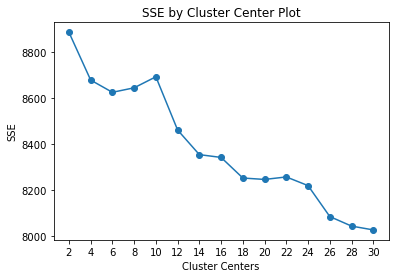

In [51]:
from sklearn.cluster import MiniBatchKMeans
def find_optimal_clusters(f, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(f).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(texte, 30)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWar

Text(0, 0.5, 'Inertia')

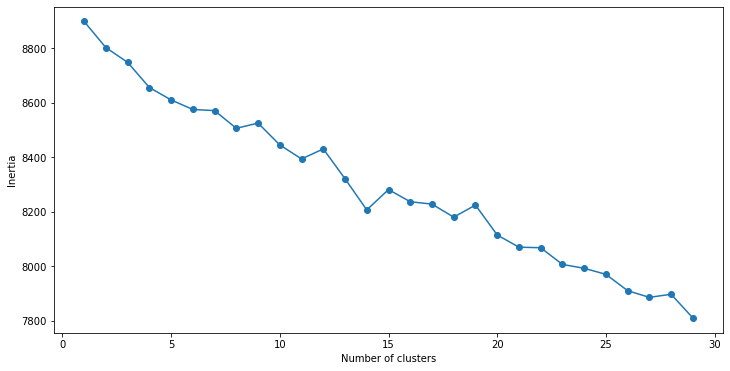

In [86]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,30):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(texte)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,30), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Silhouette Method

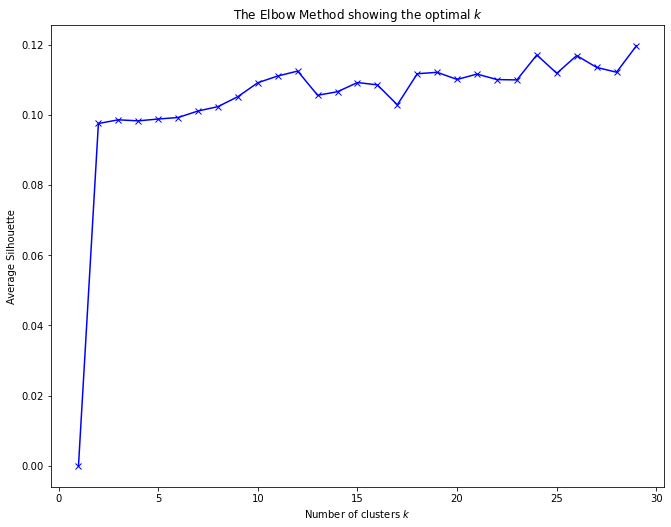

In [112]:
from sklearn.metrics import silhouette_score

scores = [0]
for i in range(2,30):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(texte)
    score = silhouette_score(texte, fitx.labels_)
    scores.append(score)
    
plt.figure(figsize=(11,8.5))
plt.plot(range(1,30), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

In [98]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(texte)

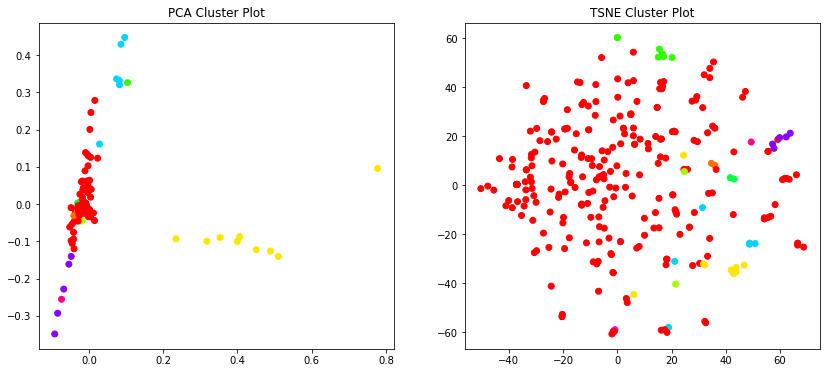

In [99]:
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(texte, clusters)

In [100]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(texte, clusters, tfidf.get_feature_names(), 10)


Cluster 0
got,new,right,people,know,think,thank,time,want,love

Cluster 1
hello,favorite,hope,world,day,legend,today,people,birthday,happy

Cluster 2
say,loud,love,laughing,said,really,want,feel,people,like

Cluster 3
time,yeah,know,cut,sorry,man,love,thank,god,oh

Cluster 4
cast,administration,general,attorney,college,said,electoral,lost,president,tramp

Cluster 5
know,really,dont,people,idea,day,feel,need,want,bad

Cluster 6
hair,right,help,really,want,new,people,dont,love,need

Cluster 7
really,love,people,think,worry,care,want,like,know,dont

Cluster 8
game,late,tramp,yes,actually,way,stream,lost,say,saw

Cluster 9
said,thought,time,stuff,dont,like,stop,bout,know,talking

Cluster 10
going,news,like,love,people,night,day,luck,morning,good

Cluster 11
vice,winning,cast,officially,president,breaking,college,mala,electoral,joe

Cluster 12
job,love,think,looking,good,meeting,man,like,day,nice

Cluster 13
face,read,summer,long,crush,like,real,life,short,thread


In [57]:

# Load the extension
%load_ext watermark

# import your libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from collections import Counter
from nltk import word_tokenize
import nltk                           
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 
from textblob import Word
from textblob import TextBlob
import sys
import string
import seaborn as sns
import re
# Determine the dependency version
%watermark -v -m -p numpy,matplotlib,pandas,watermark,seaborn,nltk
%watermark -u -n -t -z

CPython 3.8.3
IPython 7.16.1

numpy 1.18.5
matplotlib 3.2.2
pandas 1.0.5
watermark 2.0.2
seaborn 0.10.1
nltk 3.5

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit
last updated: Sat Dec 19 2020 09:39:56 Afr. centrale Ouest


# <center> <font color=darkblue>Fin</font><centre>